Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train+Test Images Matlab.mat.zip to Train+Test Images Matlab.mat.zip


Load the Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8597 - loss: 0.4802
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9536 - loss: 0.1531
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9657 - loss: 0.1124
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9747 - loss: 0.0842
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0740
313/313 - 1s - 2ms/step - accuracy: 0.9772 - loss: 0.0761

Test accuracy: 0.9771999716758728
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


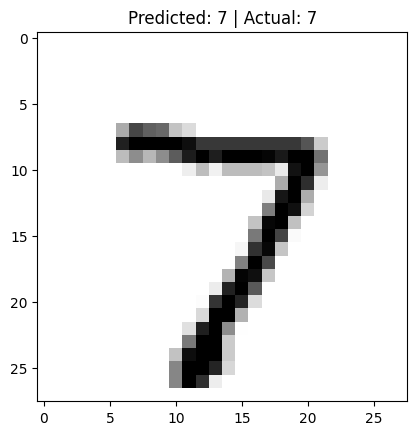

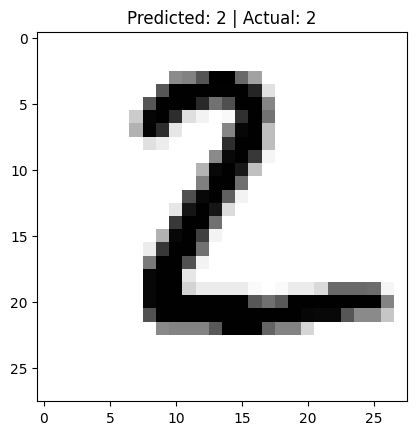

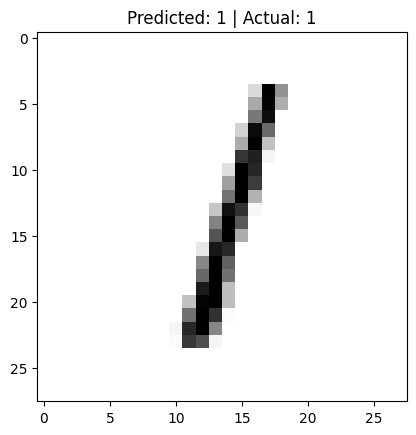

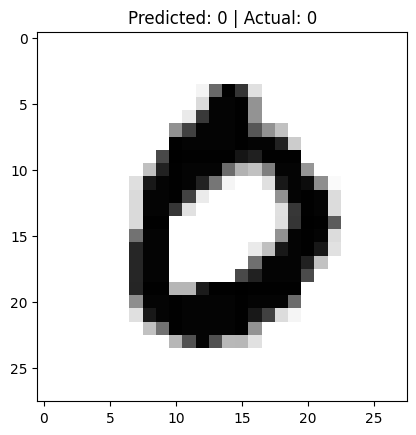

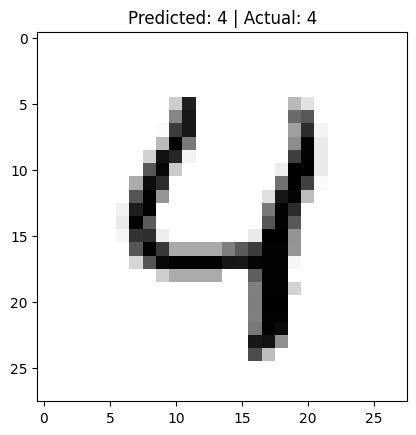

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset directly from TensorFlow
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1] by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model (simple feedforward neural network)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input (28x28 images) into a 1D array
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dropout(0.2),  # Dropout layer for regularization
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Optionally, visualize some test images and their predictions
predictions = model.predict(x_test)

# Display the first 5 test images with their predicted labels
for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {predictions[i].argmax()} | Actual: {y_test[i]}")
    plt.show()


Data Exploration

Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)
Training Labels Shape: (60000,)
Test Labels Shape: (10000,)
Unique labels in the dataset: [0 1 2 3 4 5 6 7 8 9]


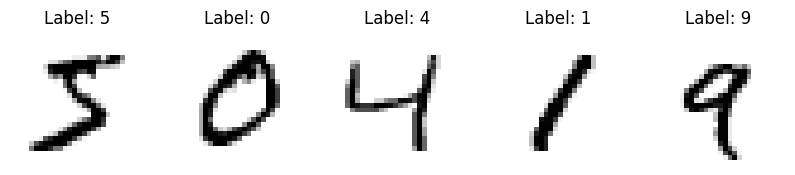

Mean of training images: 33.318421449829934
Standard deviation of training images: 78.56748998339798
Shape of the first image: (28, 28)
Pixel values of the first image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0  

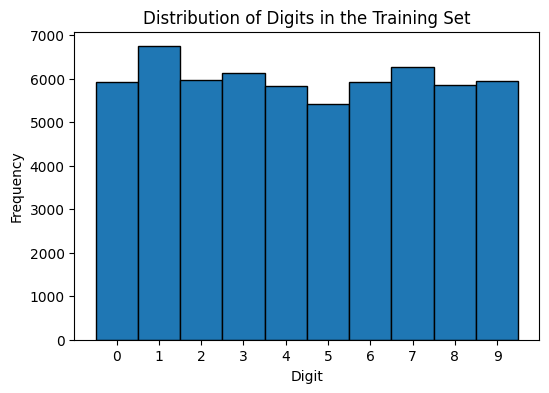

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Basic Dataset Information
print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

# Check out the unique digits in the dataset
print("Unique labels in the dataset:", np.unique(y_train))

# Visualize a few sample images and their labels from the training set
num_samples = 5
plt.figure(figsize=(10, 5))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # Display image
    plt.title(f"Label: {y_train[i]}")           # Display label
    plt.axis('off')                            # Remove axis labels

plt.show()

# Data Statistics: Mean and standard deviation of pixel values
print("Mean of training images:", np.mean(x_train))
print("Standard deviation of training images:", np.std(x_train))

# Example: Check a single image and its shape
sample_image = x_train[0]
print("Shape of the first image:", sample_image.shape)
print("Pixel values of the first image:\n", sample_image)

# Check the pixel range: min and max values for the images
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))

# Display the distribution of the target labels
plt.figure(figsize=(6, 4))
plt.hist(y_train, bins=np.arange(11) - 0.5, edgecolor='black', align='mid')
plt.title("Distribution of Digits in the Training Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.xticks(np.arange(10))
plt.show()


Check for Missing Values and Duplicates

In [ ]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check for missing values in the training and testing data
missing_train_images = np.any(np.isnan(x_train)) or np.any(np.isinf(x_train))
missing_train_labels = np.any(np.isnan(y_train)) or np.any(np.isinf(y_train))
missing_test_images = np.any(np.isnan(x_test)) or np.any(np.isinf(x_test))
missing_test_labels = np.any(np.isnan(y_test)) or np.any(np.isinf(y_test))

# Output results for missing values
print(f"Missing values in training images: {missing_train_images}")
print(f"Missing values in training labels: {missing_train_labels}")
print(f"Missing values in test images: {missing_test_images}")
print(f"Missing values in test labels: {missing_test_labels}")

# Check for duplicate images in the training and testing datasets
def check_duplicates(images, labels):
    # Convert images into a tuple of tuples (flattened version) for easy comparison
    flattened_images = [tuple(image.flatten()) for image in images]

    # Check for duplicates by comparing the number of unique flattened images to the total number of images
    unique_images = len(np.unique(flattened_images, axis=0))
    total_images = len(images)
    return unique_images != total_images

# Check for duplicates in the training and test sets
duplicates_train = check_duplicates(x_train, y_train)
duplicates_test = check_duplicates(x_test, y_test)

# Output results for duplicates
print(f"Duplicates in training images: {duplicates_train}")
print(f"Duplicates in test images: {duplicates_test}")


Missing values in training images: False
Missing values in training labels: False
Missing values in test images: False
Missing values in test labels: False
Duplicates in training images: False
Duplicates in test images: False


Visualize a Few Features

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


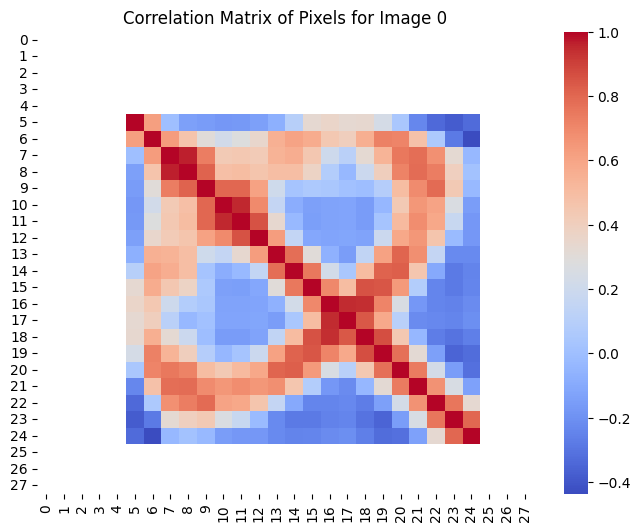

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Visualize the first image
image = x_train[0]

# 2. Calculate the correlation matrix for the image
# To compute the correlation between rows and columns, we flatten the image
# but in this case, we need to compute correlations for each row and column in the 2D image.
correlation_matrix = np.corrcoef(image)

# 3. Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix of Pixels for Image 0")
plt.show()


Identify Target and Features

Training features shape: (60000, 28, 28)
Training target shape: (60000,)
Test features shape: (10000, 28, 28)
Test target shape: (10000,)


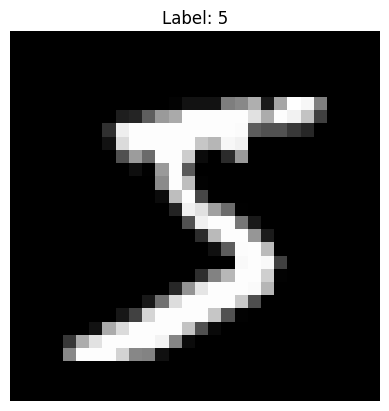

In [ ]:
import tensorflow as tf
import numpy as np

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Identify the features and target
features_train = x_train  # 28x28 pixel images for training set
target_train = y_train    # Labels (0-9) for training set

features_test = x_test    # 28x28 pixel images for test set
target_test = y_test      # Labels (0-9) for test set

# 2. Show the shape of the features and target
print("Training features shape:", features_train.shape)  # (60000, 28, 28)
print("Training target shape:", target_train.shape)    # (60000,)
print("Test features shape:", features_test.shape)      # (10000, 28, 28)
print("Test target shape:", target_test.shape)          # (10000,)

# 3. Example: Visualizing one image and its target label
import matplotlib.pyplot as plt

plt.imshow(features_train[0], cmap='gray')  # Display the first image
plt.title(f"Label: {target_train[0]}")      # Display the label for that image
plt.axis('off')
plt.show()


Convert Categorical Columns to Numerical

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Check the shape of the one-hot encoded labels
print("Shape of one-hot encoded training labels:", y_train_one_hot.shape)  # (60000, 10)
print("Shape of one-hot encoded test labels:", y_test_one_hot.shape)      # (10000, 10)

# Example of one-hot encoding
print("Original label:", y_train[0])  # e.g., 3
print("One-hot encoded label:", y_train_one_hot[0])  # e.g., [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


Shape of one-hot encoded training labels: (60000, 10)
Shape of one-hot encoded test labels: (10000, 10)
Original label: 5
One-hot encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


One-Hot Encoding

Shape of one-hot encoded training labels: (60000, 10)
Shape of one-hot encoded test labels: (10000, 10)
Original label (training): 5
One-hot encoded label (training): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


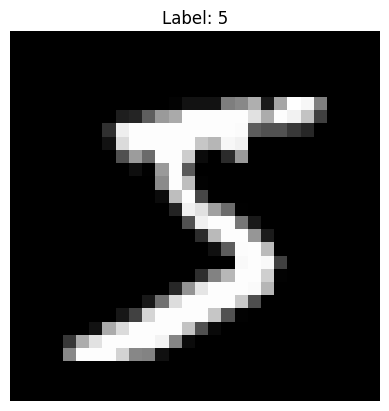

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8258 - loss: 10.1025 - val_accuracy: 0.9014 - val_loss: 0.7674
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9116 - loss: 0.5230 - val_accuracy: 0.9158 - val_loss: 0.4143
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9320 - loss: 0.2856 - val_accuracy: 0.9271 - val_loss: 0.3429
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9410 - loss: 0.2312 - val_accuracy: 0.9348 - val_loss: 0.3250
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9493 - loss: 0.2004 - val_accuracy: 0.9407 - val_loss: 0.3279


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)  # For training labels
y_test_one_hot = to_categorical(y_test, num_classes=10)    # For test labels

# 3. Check the shape of the one-hot encoded labels
print("Shape of one-hot encoded training labels:", y_train_one_hot.shape)  # (60000, 10)
print("Shape of one-hot encoded test labels:", y_test_one_hot.shape)      # (10000, 10)

# 4. Example of one-hot encoding for the first image
print("Original label (training):", y_train[0])  # For example: 3
print("One-hot encoded label (training):", y_train_one_hot[0])  # For example: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

# 5. Visualizing the first image with its corresponding label
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")  # Display the original label
plt.axis('off')
plt.show()

# 6. Model Definition: A simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 image into 1D array
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with softmax activation for 10 classes
])

# 7. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical Crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# 8. Train the model
model.fit(x_train, y_train_one_hot, epochs=5, batch_size=64, validation_data=(x_test, y_test_one_hot))


Feature Scaling

Shape of scaled training images: (60000, 28, 28)
Shape of scaled test images: (10000, 28, 28)
Shape of one-hot encoded training labels: (60000, 10)
Shape of one-hot encoded test labels: (10000, 10)


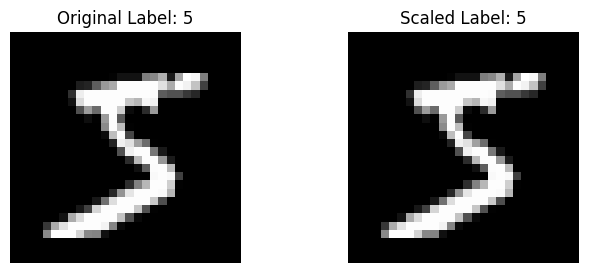

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8586 - loss: 0.5076 - val_accuracy: 0.9527 - val_loss: 0.1608
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9603 - loss: 0.1405 - val_accuracy: 0.9663 - val_loss: 0.1145
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9726 - loss: 0.0967 - val_accuracy: 0.9717 - val_loss: 0.0936
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9777 - loss: 0.0725 - val_accuracy: 0.9702 - val_loss: 0.0958
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9842 - loss: 0.0558 - val_accuracy: 0.9762 - val_loss: 0.0754


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Feature Scaling: Normalize the pixel values to the range [0, 1]
x_train_scaled = x_train / 255.0  # Scale training images to [0, 1]
x_test_scaled = x_test / 255.0    # Scale test images to [0, 1]

# 3. Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)  # For training labels
y_test_one_hot = to_categorical(y_test, num_classes=10)    # For test labels

# 4. Check the shape of the scaled images and one-hot encoded labels
print("Shape of scaled training images:", x_train_scaled.shape)  # (60000, 28, 28)
print("Shape of scaled test images:", x_test_scaled.shape)      # (10000, 28, 28)
print("Shape of one-hot encoded training labels:", y_train_one_hot.shape)  # (60000, 10)
print("Shape of one-hot encoded test labels:", y_test_one_hot.shape)      # (10000, 10)

# 5. Visualize the first image and its pixel values before and after scaling
plt.figure(figsize=(8, 3))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Original Label: {y_train[0]}")
plt.axis('off')

# Scaled image
plt.subplot(1, 2, 2)
plt.imshow(x_train_scaled[0], cmap='gray')
plt.title(f"Scaled Label: {y_train[0]}")
plt.axis('off')

plt.show()

# 6. Model Definition: A simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 image into 1D array
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with softmax activation for 10 classes
])

# 7. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical Crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# 8. Train the model
model.fit(x_train_scaled, y_train_one_hot, epochs=5, batch_size=64, validation_data=(x_test_scaled, y_test_one_hot))


Train-Test Split

Shape of training images: (48000, 28, 28)
Shape of validation images: (12000, 28, 28)
Shape of test images: (10000, 28, 28)
Shape of one-hot encoded training labels: (48000, 10)
Shape of one-hot encoded validation labels: (12000, 10)
Shape of one-hot encoded test labels: (10000, 10)


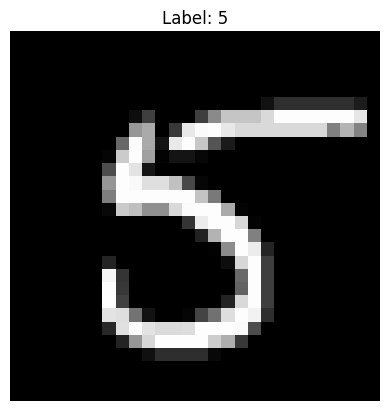

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8441 - loss: 0.5583 - val_accuracy: 0.9456 - val_loss: 0.1847
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9541 - loss: 0.1613 - val_accuracy: 0.9618 - val_loss: 0.1301
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9694 - loss: 0.1083 - val_accuracy: 0.9682 - val_loss: 0.1122
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9777 - loss: 0.0759 - val_accuracy: 0.9703 - val_loss: 0.0999
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9819 - loss: 0.0629 - val_accuracy: 0.9743 - val_loss: 0.0880
313/313 - 1s - 2ms/step - accuracy: 0.9734 - loss: 0.0838
Test accuracy: 0.9733999967575073


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split  # Import train_test_split for custom splitting

# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Feature Scaling: Normalize the pixel values to the range [0, 1]
x_train_scaled = x_train / 255.0  # Scale training images to [0, 1]
x_test_scaled = x_test / 255.0    # Scale test images to [0, 1]

# 3. Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)  # For training labels
y_test_one_hot = to_categorical(y_test, num_classes=10)    # For test labels

# 4. Custom Train-Test Split (splitting the training data into train and validation sets)
# Here we use sklearn's train_test_split to create a validation set from the training data
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_scaled, y_train_one_hot, test_size=0.2, random_state=42  # 20% for validation
)

# 5. Check the shape of the splits
print("Shape of training images:", x_train_split.shape)  # (48000, 28, 28)
print("Shape of validation images:", x_val_split.shape)  # (12000, 28, 28)
print("Shape of test images:", x_test_scaled.shape)      # (10000, 28, 28)
print("Shape of one-hot encoded training labels:", y_train_split.shape)  # (48000, 10)
print("Shape of one-hot encoded validation labels:", y_val_split.shape)  # (12000, 10)
print("Shape of one-hot encoded test labels:", y_test_one_hot.shape)    # (10000, 10)

# 6. Visualize the first image from the training split
plt.imshow(x_train_split[0], cmap='gray')
plt.title(f"Label: {np.argmax(y_train_split[0])}")  # Display label based on one-hot encoding
plt.axis('off')
plt.show()

# 7. Model Definition: A simple neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 image into 1D array
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with softmax activation for 10 classes
])

# 8. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical Crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# 9. Train the model with validation data
model.fit(x_train_split, y_train_split, epochs=5, batch_size=64, validation_data=(x_val_split, y_val_split))

# 10. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test_scaled, y_test_one_hot, verbose=2)
print(f"Test accuracy: {test_acc}")


Model Building

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8404 - loss: 0.5624 - val_accuracy: 0.9459 - val_loss: 0.1868
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9517 - loss: 0.1679 - val_accuracy: 0.9602 - val_loss: 0.1367
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9693 - loss: 0.1123 - val_accuracy: 0.9668 - val_loss: 0.1115
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9773 - loss: 0.0783 - val_accuracy: 0.9721 - val_loss: 0.0951
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9827 - loss: 0.0604 - val_accuracy: 0.9732 - val_loss: 0.0902
313/313 - 1s - 2ms/step - accuracy: 0.9744 - loss: 0.0827
Test accuracy: 0.974399983882904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


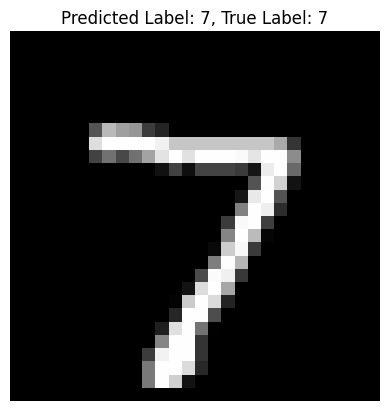

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Feature Scaling: Normalize the pixel values to the range [0, 1]
x_train_scaled = x_train / 255.0  # Scale training images to [0, 1]
x_test_scaled = x_test / 255.0    # Scale test images to [0, 1]

# 3. Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)  # For training labels
y_test_one_hot = to_categorical(y_test, num_classes=10)    # For test labels

# 4. Define the Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images into 1D arrays
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 units (one for each digit) and softmax activation
])

# 5. Compile the Model
model.compile(optimizer='adam',  # Adam optimizer
              loss='categorical_crossentropy',  # Crossentropy loss for multi-class classification
              metrics=['accuracy'])  # Evaluate accuracy during training

# 6. Train the Model
model.fit(x_train_scaled, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.2)

# 7. Evaluate the Model
test_loss, test_acc = model.evaluate(x_test_scaled, y_test_one_hot, verbose=2)
print(f"Test accuracy: {test_acc}")

# 8. Visualize the first image from the test set
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted Label: {np.argmax(model.predict(x_test_scaled[0:1]))}, True Label: {y_test[0]}")
plt.axis('off')
plt.show()


Evaluation

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8412 - loss: 0.5728 - val_accuracy: 0.9522 - val_loss: 0.1761
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9529 - loss: 0.1638 - val_accuracy: 0.9612 - val_loss: 0.1361
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9671 - loss: 0.1126 - val_accuracy: 0.9691 - val_loss: 0.1080
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9752 - loss: 0.0838 - val_accuracy: 0.9722 - val_loss: 0.0984
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9818 - loss: 0.0621 - val_accuracy: 0.9734 - val_loss: 0.0925
313/313 - 1s - 3ms/step - accuracy: 0.9734 - loss: 0.0875
Test accuracy: 0.9733999967575073
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


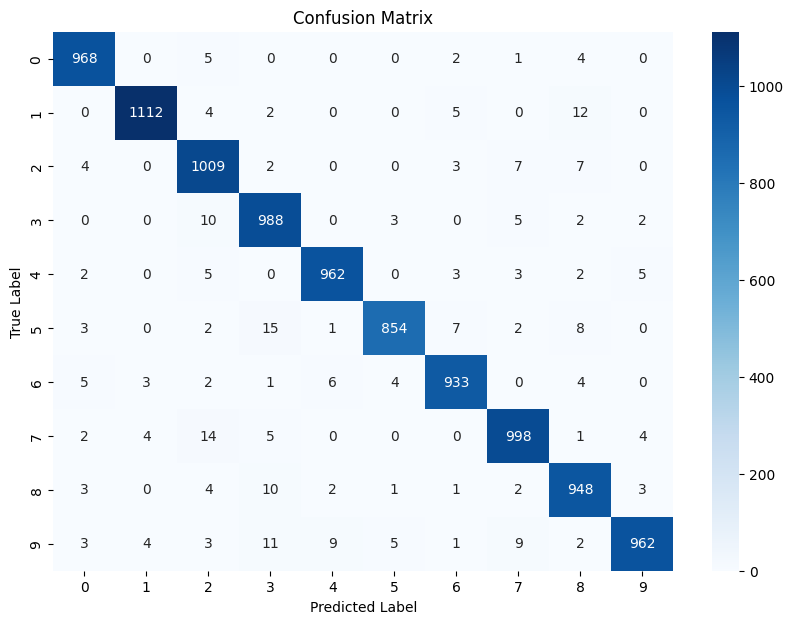


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.95      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



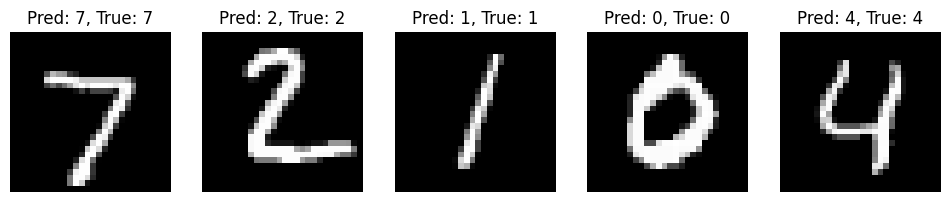

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Feature Scaling: Normalize the pixel values to the range [0, 1]
x_train_scaled = x_train / 255.0  # Scale training images to [0, 1]
x_test_scaled = x_test / 255.0    # Scale test images to [0, 1]

# 3. Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)  # For training labels
y_test_one_hot = to_categorical(y_test, num_classes=10)    # For test labels

# 4. Define the Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images into 1D arrays
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 units (one for each digit) and softmax activation
])

# 5. Compile the Model
model.compile(optimizer='adam',  # Adam optimizer
              loss='categorical_crossentropy',  # Crossentropy loss for multi-class classification
              metrics=['accuracy'])  # Evaluate accuracy during training

# 6. Train the Model
model.fit(x_train_scaled, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.2)

# 7. Evaluate the Model
test_loss, test_acc = model.evaluate(x_test_scaled, y_test_one_hot, verbose=2)
print(f"Test accuracy: {test_acc}")

# 8. Confusion Matrix and Classification Report
y_test_pred = model.predict(x_test_scaled)  # Get model predictions on the test set
y_test_pred_labels = np.argmax(y_test_pred, axis=1)  # Get the predicted class labels

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_labels))

# 9. Visualizing Model Predictions
plt.figure(figsize=(12, 12))
for i in range(5):  # Display 5 test images with predictions
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {y_test_pred_labels[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()


Make Predictions from New Input

In [ ]:
from PIL import Image
import numpy as np
import os

# Path to your new image
new_image_path = 'path_to_new_image.png'

# Check if the image path exists
if not os.path.exists(new_image_path):
    print(f"Error: The image file '{new_image_path}' does not exist.")
else:
    try:
        # Try to open and process the image
        new_image = Image.open(new_image_path)
        new_image = new_image.convert('L')  # Convert the image to grayscale (if not already)
        new_image = new_image.resize((28, 28))  # Resize the image to 28x28 pixels

        # Normalize and reshape the image
        new_image_array = np.array(new_image) / 255.0
        new_image_array = new_image_array.reshape(1, 28, 28)  # Reshape to (1, 28, 28)

        print("Image processed successfully!")
    except Exception as e:
        print(f"Error opening or processing image: {e}")


Error: The image file 'path_to_new_image.png' does not exist.


Convert to DataFrame and Encode

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Convert the training and test datasets into DataFrames
# Reshaping the x_train and x_test to have a flat structure
# Each image is a 28x28 pixel array, we flatten it into a 784-dimensional vector

# Flatten the images
x_train_flattened = x_train.reshape(-1, 28 * 28)  # Shape becomes (60000, 784)
x_test_flattened = x_test.reshape(-1, 28 * 28)  # Shape becomes (10000, 784)

# Create DataFrames
train_df = pd.DataFrame(x_train_flattened)
test_df = pd.DataFrame(x_test_flattened)

# Add target labels (y_train and y_test) to DataFrame
train_df['label'] = y_train
test_df['label'] = y_test

# Show the first few rows of the train DataFrame
print(train_df.head())

# 3. One-Hot Encoding of Labels
# Use `to_categorical` from Keras to one-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# 4. Now the data is ready for use in a deep learning model
# You can proceed to split, scale, or further process the data for model training

# 5. Example: Checking the shape of the one-hot encoded labels
print(f"One-hot encoded y_train shape: {y_train_one_hot.shape}")
print(f"One-hot encoded y_test shape: {y_test_one_hot.shape}")

# Example: Check the first one-hot encoded label
print("First one-hot encoded label in y_train:")
print(y_train_one_hot[0])


   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]
One-hot encoded y_train shape: (60000, 10)
One-hot encoded y_test shape: (10000, 10)
First one-hot encoded label in y_train:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Predict the Final Grade

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# 1. Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Convert the training and test datasets into DataFrames
# Reshaping the x_train and x_test to have a flat structure
# Each image is a 28x28 pixel array, we flatten it into a 784-dimensional vector

# Flatten the images
x_train_flattened = x_train.reshape(-1, 28 * 28)  # Shape becomes (60000, 784)
x_test_flattened = x_test.reshape(-1, 28 * 28)  # Shape becomes (10000, 784)

# Create DataFrames
train_df = pd.DataFrame(x_train_flattened)
test_df = pd.DataFrame(x_test_flattened)

# Add target labels (y_train and y_test) to DataFrame
train_df['label'] = y_train
test_df['label'] = y_test

# Show the first few rows of the train DataFrame
print(train_df.head())

# 3. One-Hot Encoding of Labels
# Use `to_categorical` from Keras to one-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# 4. Now the data is ready for use in a deep learning model
# You can proceed to split, scale, or further process the data for model training

# 5. Example: Checking the shape of the one-hot encoded labels
print(f"One-hot encoded y_train shape: {y_train_one_hot.shape}")
print(f"One-hot encoded y_test shape: {y_test_one_hot.shape}")

# Example: Check the first one-hot encoded label
print("First one-hot encoded label in y_train:")
print(y_train_one_hot[0])


   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]
One-hot encoded y_train shape: (60000, 10)
One-hot encoded y_test shape: (10000, 10)
First one-hot encoded label in y_train:
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Deployment-Building an Interactive App

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


Create a Prediction Function

In [ ]:
uploaded_image = st.file_uploader("Choose an image...", type=["png", "jpg", "jpeg"])

if uploaded_image is not None:
    try:
        # Open image using PIL
        image = Image.open(uploaded_image)

        # Convert the image to grayscale
        image = image.convert('L')

        # Continue with your logic (resize, predict, etc.)
        st.image(image, caption="Grayscale Image", use_column_width=True)

    except Exception as e:
        st.error(f"Error: {e}. Please upload a valid image file.")


2025-05-07 09:05:32.089 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:05:32.090 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:05:32.091 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:05:32.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:05:32.216 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-07 09:05:32.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Create the Gradio Interface

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00
